In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import joblib
df = joblib.load(r"D:\ML Projects\Employee Performance Analysis\artifacts\encoders\labelencoder.pkl")


In [4]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,ExperienceStability,PromotionStagnation,WorkStressIndex
0,32,1,2,2,5,13,2,10,3,4,...,2,10,7,0,8,0,3,0.909091,0.000000,0
1,47,1,2,2,5,13,2,14,4,4,...,3,7,7,1,7,0,3,0.333333,0.047619,0
2,40,1,1,1,5,13,1,5,4,4,...,3,18,13,1,12,0,4,0.857143,0.047619,2
3,41,1,0,0,3,8,2,10,4,2,...,2,21,6,12,6,0,3,0.875000,0.500000,0
4,60,1,2,2,5,13,2,16,4,1,...,3,2,2,2,2,0,3,0.181818,0.181818,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,3,6,5,0,4,0,4,0.857143,0.000000,2
1196,37,1,1,2,1,15,2,10,2,4,...,3,1,0,0,0,0,3,0.200000,0.000000,0
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,8,3,8,0,3,0.952381,0.142857,2
1198,34,0,3,2,0,1,2,9,3,4,...,4,8,7,7,7,0,3,0.800000,0.700000,0


<Axes: >

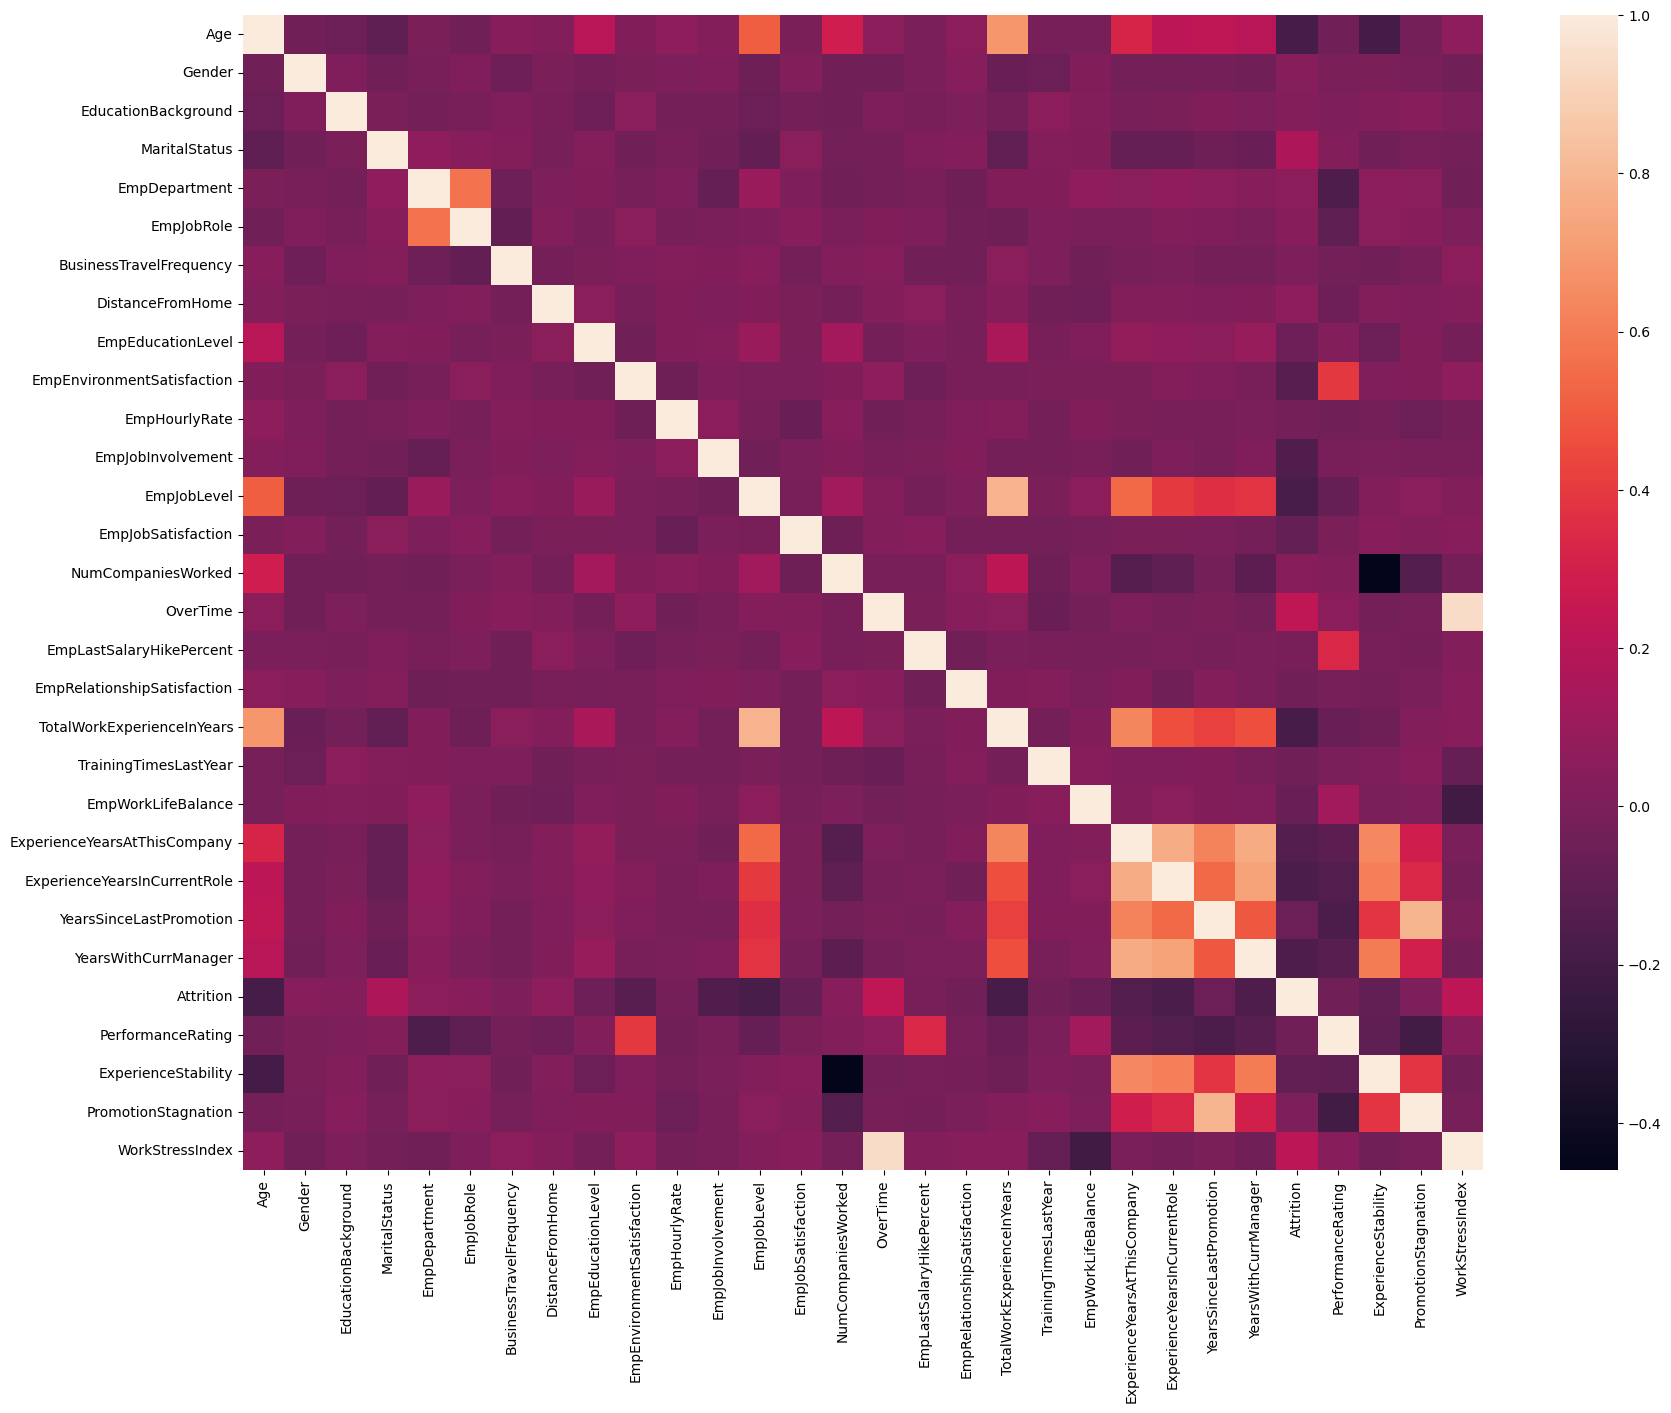

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

Insights:

Correlation analysis revelaed strong relationships among experience and promotion-related features, indicating potential multicollinearity. Performance rating showes stronger associations with salary hikes and environmenet satisfactions, while demographic variables exhibited minimal influcence.

Feature Importance

In [10]:
X = df.drop(columns=['PerformanceRating'])
y = df['PerformanceRating']

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X,y)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
importances=pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

EmpLastSalaryHikePercent        0.235050
EmpEnvironmentSatisfaction      0.212261
PromotionStagnation             0.071744
YearsSinceLastPromotion         0.049407
EmpJobRole                      0.038813
ExperienceYearsInCurrentRole    0.036334
EmpWorkLifeBalance              0.033306
EmpHourlyRate                   0.032225
ExperienceYearsAtThisCompany    0.026194
EmpDepartment                   0.025879
ExperienceStability             0.025797
TotalWorkExperienceInYears      0.022711
YearsWithCurrManager            0.022147
Age                             0.021950
DistanceFromHome                0.021650
NumCompaniesWorked              0.012988
EmpEducationLevel               0.012512
TrainingTimesLastYear           0.012480
EmpJobSatisfaction              0.010877
EducationBackground             0.010639
EmpJobLevel                     0.010405
EmpRelationshipSatisfaction     0.009969
MaritalStatus                   0.008979
EmpJobInvolvement               0.008362
WorkStressIndex 

Insights:
| Rank | Feature                        | Importance | Interpretation                                    |
| ---- | ------------------------------ | ---------- | ------------------------------------------------- |
| 1    | **EmpLastSalaryHikePercent**   | 0.235      | Financial recognition strongly boosts performance |
| 2    | **EmpEnvironmentSatisfaction** | 0.212      | Positive work environment drives productivity     |
| 3    | **PromotionStagnation**        | 0.072      | Career stagnation reduces motivation              |
| 4    | YearsSinceLastPromotion        | 0.049      | Long gaps lower performance                       |
| 5    | EmpJobRole                     | 0.039      | Role responsibilities matter                      |


Shap Values

In [13]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

In [14]:
print(np.array(shap_values).shape)

(1200, 29, 3)


In [15]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[1].shape)
print(X.shape)

<class 'numpy.ndarray'>
1200
(29, 3)
(1200, 29)


In [16]:
y.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

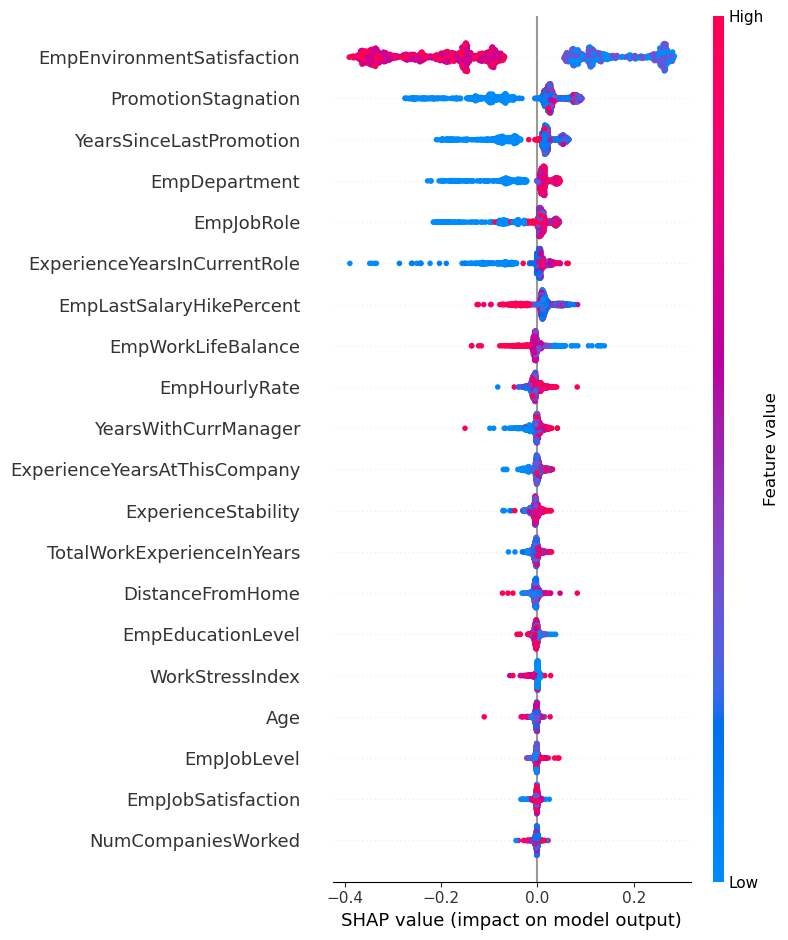

In [17]:
shap.summary_plot(shap_values[:, :, 0], X)

Insights:

1. Low EmpEnvironmentSatisfaction

Strong negative impact

Poor work environment → lower performance

2. Promotion Stagnation & YearsSinceLastPromotion

Long gaps without promotion push performance down

3. Low Work-Life Balance

Employees with poor balance tend to stay in lower performance band

4. Department & Job Role

Certain roles/departments structurally contribute to lower ratings

# Shap plot for 3 performance Rating

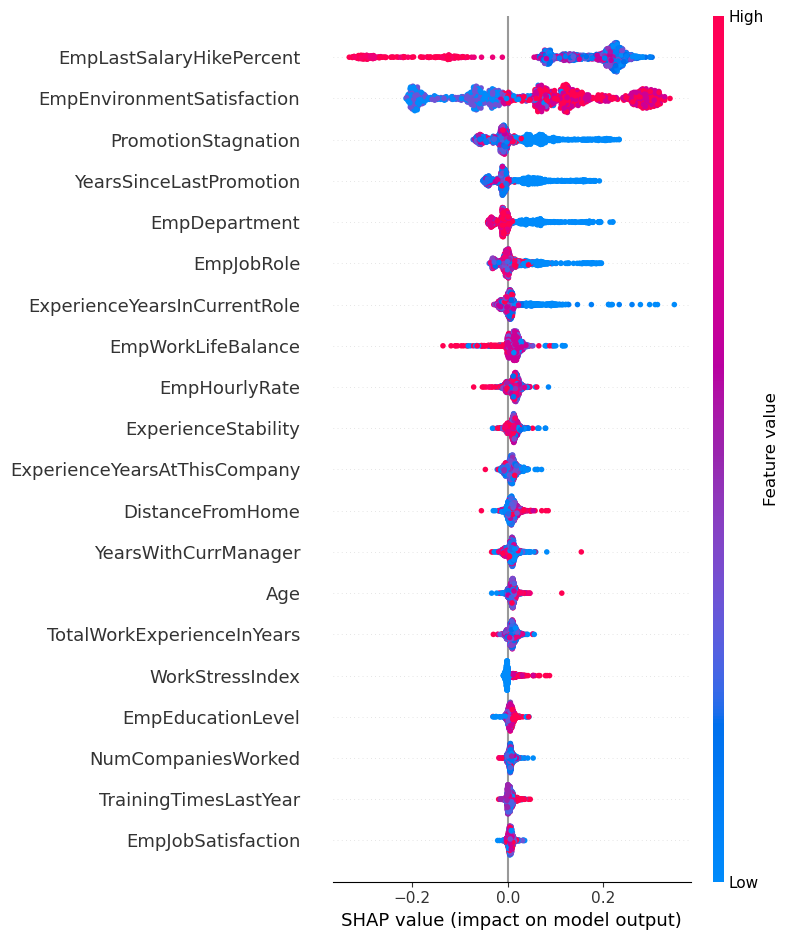

In [18]:
shap.summary_plot(shap_values[:, :, 1], X)

Insights: 

Employees with moderate salary growth, stable environment satisfaction, and role continuity tend to maintain average performance levels without transitioning to high performance.

# Shap plot for 4 Performance Rating

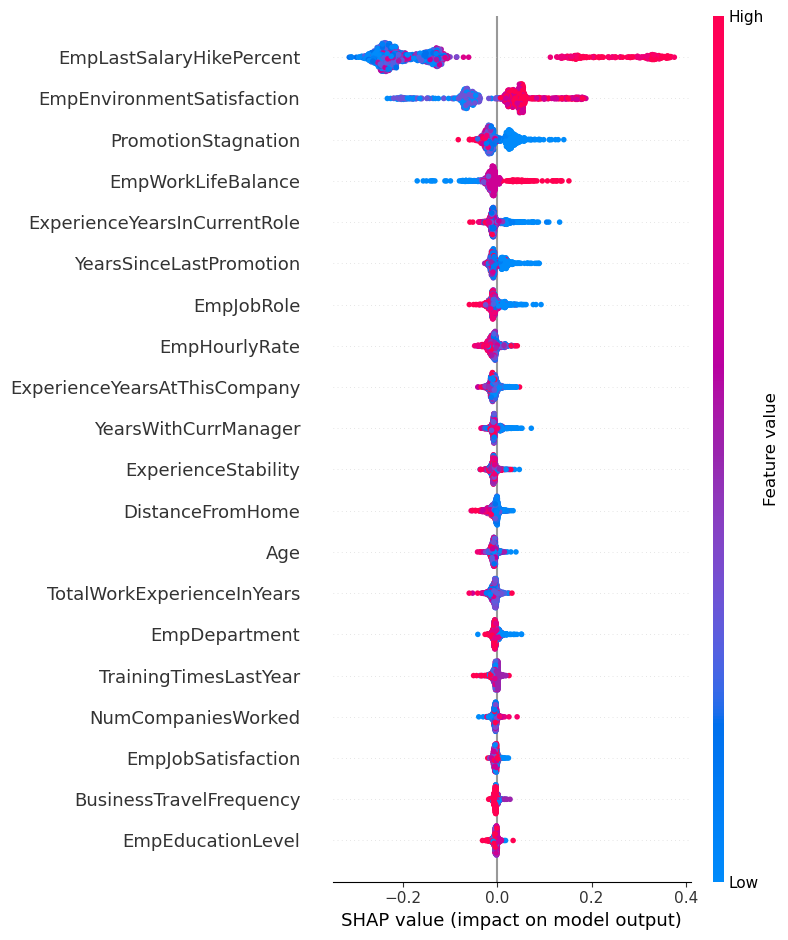

In [19]:
shap.summary_plot(shap_values[:, :, 2], X)

High-performing employees are characterized by fair salary growth, supportive work environments, timely promotions, and balanced work–life conditions.

Business Recommendations:
1. Improve Work Environment
    1. Improve manager support
    2. Enhance team culture
    3. Address environment dissatisfaction early

2. Performace-linked Salary Hikes
    1. Ensure fair and timely salary increments
    2. Reward high performaers to sustain motivation

3. Reduce Promotion Stagnation
    1. Introduce career progression paths
    2. Internal role rotations
    3. Transparent Promotion cycles

4. Improve work-life balance
    1. cna be flexible working time
    2. Need to control overtime
    

# Selecting top 15 features 

In [29]:
X = df.drop(columns=['Attrition'])
X_top15 = X[importances.head(15).index]

scaler = StandardScaler()
scaled_X= scaler.fit_transform(X_top15)
y = df['PerformanceRating']

In [42]:
scaled_X_df = pd.DataFrame(scaled_X,columns=X_top15.columns,index=df.index)
processed_df = pd.concat([scaled_X_df, y], axis=1)
processed_df.head()
joblib.dump(scaler, r"D:\ML Projects\Employee Performance Analysis\artifacts\features\processed_df.pkl")

['D:\\ML Projects\\Employee Performance Analysis\\artifacts\\features\\processed_df.pkl']

In [43]:
processed_df

,EmpLastSalaryHikePercent,EmpEnvironmentSatisfaction,PromotionStagnation,YearsSinceLastPromotion,EmpJobRole,ExperienceYearsInCurrentRole,EmpWorkLifeBalance,EmpHourlyRate,ExperienceYearsAtThisCompany,EmpDepartment,ExperienceStability,TotalWorkExperienceInYears,YearsWithCurrManager,Age,DistanceFromHome,PerformanceRating
0,-0.889111,1.177978,-0.802306,-0.681372,0.833426,0.749766,-1.064491,-0.543569,0.468778,1.052350,1.141511,-0.170645,1.100251,-0.541458,0.102061,3
1,-0.889111,1.177978,-0.583551,-0.370834,0.833426,0.749766,0.365956,-1.187042,-0.012431,1.052350,-0.876785,1.112397,0.817773,1.109888,0.591464,3
2,1.594054,1.177978,-0.583551,-0.370834,0.833426,2.410786,0.365956,-0.890055,1.752001,1.052350,0.959409,1.112397,2.230163,0.339260,-0.509693,4
3,-0.061389,-0.656641,1.494628,3.045084,-0.218658,0.472929,-1.064491,0.347393,2.233210,-0.126754,1.022007,1.497310,0.535296,0.449349,0.102061,3
4,-0.337297,-1.573950,0.032942,-0.060296,0.833426,-0.634417,0.365956,0.891870,-0.814446,1.052350,-1.407916,-0.170645,-0.594616,2.541054,0.836165,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.318147,1.177978,-0.802306,-0.681372,0.833426,0.196093,0.365956,0.248397,-0.172834,1.052350,0.959409,-0.683861,-0.029660,-1.091906,-0.754394,4
1196,0.490425,1.177978,-0.802306,-0.681372,1.254260,-1.188091,0.365956,0.693878,-0.974849,-1.305857,-1.344180,-0.940470,-1.159572,0.008991,0.102061,3
1197,-1.165018,1.177978,-0.146040,0.250242,1.254260,1.026603,0.365956,0.396891,2.072807,-1.305857,1.293263,1.112397,1.100251,1.440157,2.304373,3
1198,-0.337297,1.177978,2.413401,1.492394,-1.691577,0.749766,1.796403,-0.989050,0.147972,-1.895409,0.759097,-0.298949,0.817773,-0.321278,-0.020290,3


In [36]:
import joblib

joblib.dump(scaler, r"D:\ML Projects\Employee Performance Analysis\artifacts\preprocessors\standard_scaler.pkl")


['D:\\ML Projects\\Employee Performance Analysis\\artifacts\\preprocessors\\standard_scaler.pkl']

In [39]:
top15_features = X_top15.columns.tolist()
joblib.dump(top15_features, r"D:\ML Projects\Employee Performance Analysis\artifacts\features\top15_features.pkl")


['D:\\ML Projects\\Employee Performance Analysis\\artifacts\\features\\top15_features.pkl']

In [40]:
joblib.dump(importances, r"D:\ML Projects\Employee Performance Analysis\artifacts\features/feature_importances.pkl")

['D:\\ML Projects\\Employee Performance Analysis\\artifacts\\features/feature_importances.pkl']